In [1]:
import os
import shutil

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import cv2
print(cv2.__version__)

os.listdir()

4.4.0


['.ipynb_checkpoints',
 'frames',
 '.git',
 'weights',
 'data',
 '.gitignore',
 'eda.ipynb',
 '.idea',
 '.gitattributes',
 'aiblitz']

# Looking at the Input Data

## Problem 1 - Pieces

In [2]:
df_train = pd.read_csv("data/Q1/train.csv")
df_val = pd.read_csv("data/Q1/val.csv")

df_train.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/Q1/train.csv'

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    image = plt.imread("data/Q1/train/%d.jpg" % df_train.iloc[i + 6]["ImageID"])
    plt.axis('off')
    plt.imshow(image)

## Problem 2 - Points

In [ ]:
df_train = pd.read_csv("data/Q2/train.csv")
df_val = pd.read_csv("data/Q2/val.csv")

df_train.head()

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    image = plt.imread("data/Q2/train/%d.jpg" % df_train.iloc[i + 6]["ImageID"])
    plt.axis('off')
    plt.imshow(image)

## Problem 3 - Configuration

In [ ]:
df_train = pd.read_csv("data/Q3/train.csv")
df_val = pd.read_csv("data/Q3/val.csv")

df_train.head()

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    image = plt.imread("data/Q3/train/%d.jpg" % df_train.iloc[i + 6]["ImageID"])
    plt.axis('off')
    plt.imshow(image)

## Problem 4 - Extract Frames

Extract multiple frames from a short video.

In [6]:
from aiblitz.model import Net
from aiblitz.predictor import predict_one
import torch

"""
Frames are read from mp4 file present at dir_in/filename.mp4
and the frames are extracted to dir_out/filename/frameN.jpg
The first frame is recorded at 0ms, and every next frame is
with a delay of DELAYms
"""
DELAY = 100 # in milliseconds
model = Net()
model.load_state_dict(torch.load("weights/piece-recognizer.h5"))
model.eval()

def show_extracted_frames(dir_out, filename):
    dir_path = os.path.join(dir_out, filename)
    
    frames = [int(x.split(".")[0]) for x in os.listdir(dir_path)]
    frames = sorted(frames)
    frame_count = len(frames)
    
    cols = 3
    rows = (frame_count + cols - 1) // cols
    
    plt.figure(figsize=(20, 20))
    for i, framename in enumerate(frames):
        plt.subplot(cols, rows, i + 1)
        plt.axis('off')
        framepath = os.path.join(dir_path, f"{framename}.jpg")
        plt.imshow(plt.imread(framepath))
    
def extract_images(dir_in, filename, dir_out):   
    vidcap = cv2.VideoCapture(os.path.join(dir_in, filename) + ".mp4")
    path_out = os.path.join(dir_out, filename)
    
    try:
        os.mkdir(path_out)
    except FileExistsError:
        shutil.rmtree(path_out)
        os.mkdir(path_out)

    index = 0
    
    while True:
        vidcap.set(cv2.CAP_PROP_POS_MSEC, (index * DELAY))
        success, image_frame = vidcap.read()
        
        if not success:
            break

        cv2.imwrite(os.path.join(path_out, f"{index}.jpg"), image_frame)       
        index = index + 1

    show_extracted_frames(dir_out, filename)
    return index

def extract_fens(dir_in, filename, dir_out):
    vidcap = cv2.VideoCapture(os.path.join(dir_in, filename) + ".mp4")
    path_out = os.path.join(dir_out, filename)

    prev_board = None
    index = 0
    
    frames = []
    
    while True:
        vidcap.set(cv2.CAP_PROP_POS_MSEC, (index * DELAY))
        index += 1
        success, image_frame = vidcap.read()
        
        if not success:
            break
        
        curr_board = predict_one(model, image_frame)

        # comparing current image with previous image
        # does not work because of artificial noise
        # so we compare the integer boards instead
        if prev_board is not None and torch.all(torch.eq(prev_board, curr_board)):
            continue
        
        prev_board = curr_board
        frames.append(prev_board)
    
    # TODO: frames contains all unique frames, save them somewhere as a CSV
    return len(frames)

# Visual appetizer
# extracted = extract_images("data/val", "400", "frames")
# print(f"Frames found: {extracted}")

# Serious business
extracted = extract_fens("data/val", "400", "frames")
print(f"Frames found: {extracted}")

Frames found: 6


## Problem 5 - Win Prediction

In [11]:
df_train = pd.read_csv("data/Q5/train.csv")
df_val = pd.read_csv("data/Q5/val.csv")

df_train.head()

,ImageID,turn,label
0,0,white,white
1,1,black,white
2,2,white,black
3,3,white,white
4,4,white,black


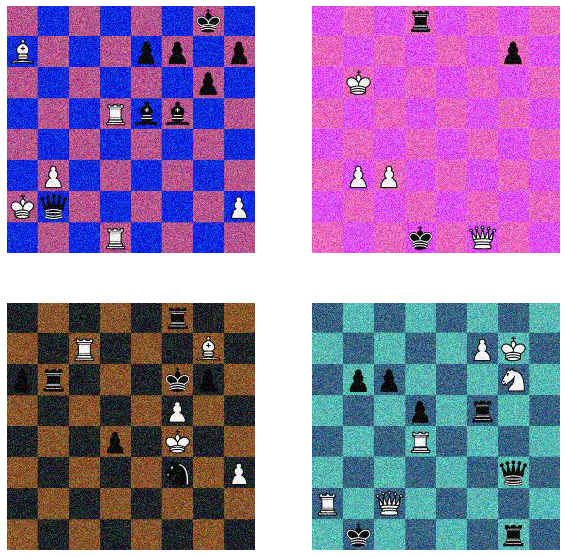

In [12]:
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    image = plt.imread("data/Q5/train/%d.jpg" % df_train.iloc[i + 6]["ImageID"])
    plt.axis('off')
    plt.imshow(image)
